<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Pb" data-toc-modified-id="Pb-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Pb</a></span></li><li><span><a href="#Ag" data-toc-modified-id="Ag-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Ag</a></span></li><li><span><a href="#Au" data-toc-modified-id="Au-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Au</a></span></li></ul></li><li><span><a href="#суммарная-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="суммарная-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>суммарная концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
try:
    test_frame = pd.read_csv("/datasets/gold_recovery_test_new.csv")
    train_frame = pd.read_csv("/datasets/gold_recovery_train_new.csv")
    full_frame = pd.read_csv("/datasets/gold_recovery_full_new.csv")
except:
    test_frame = pd.read_csv("https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv")
    train_frame = pd.read_csv("https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv")
    full_frame = pd.read_csv("https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv")

In [ ]:
datasets = [test_frame, train_frame, full_frame]
for dataset in datasets:
    display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None

вычислим эффективность обогащения на обучающей выборке

In [ ]:
C = train_frame['rougher.output.concentrate_au']
F = train_frame['rougher.input.feed_au']
T = train_frame['rougher.output.tail_au']

In [ ]:
train_frame['recovery_calc'] = ((C*(F-T))/(F*(C-T)))*100

In [ ]:
if train_frame['recovery_calc'].mean() == train_frame['rougher.output.recovery'].mean(): 
    print(train_frame['recovery_calc'].mean(), " =",train_frame['rougher.output.recovery'].mean())
    print("эффективность рассчитана верно, значения совпадают")
else:
    print("эффективность рассчитана неверно, значения не совпадают") 
    

82.70450164550293  = 82.70450164550293
эффективность рассчитана верно, значения совпадают


In [ ]:
MAE = mean_absolute_error(train_frame['recovery_calc'], train_frame['rougher.output.recovery'])
print(MAE)

9.73512347450521e-15


MAE = 9.73512347450521e-15 -> формула для расчета эффективности корректная, и доступные данные ее подтверждают.

In [ ]:
train_frame.drop('recovery_calc', axis=1, inplace=True)

просмотр недоступных признаков в тестовой выборке 

In [ ]:
set(train_frame.columns)-set(test_frame.columns) 

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Мы видим, что это признаки, которые относятся к вторичным стадиям обогащения, параметры продуктов, расчетные характеристики, относящиеся к разным этапам, т.е значения final.output, primary_cleaner.output, rougher.calculations, rougher.output, secondary_cleaner.output

## Анализ данных

пропущеныне значения 

In [ ]:
for i in datasets:
    display(dataset.isna().sum())

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [ ]:
for dataset in datasets:
    dataset.ffill(axis='rows', inplace=True)

заполним значения

In [ ]:
print(train_frame.duplicated().sum())
print(test_frame.duplicated().sum())
print(full_frame.duplicated().sum())

0
0
0


Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

In [ ]:
df_pb = full_frame[['rougher.output.concentrate_pb', 
              'primary_cleaner.output.concentrate_pb', 
              'final.output.concentrate_pb']]
df_pb = df_pb.rename(columns={'rougher.output.concentrate_pb': 'флотация', 
                              'primary_cleaner.output.concentrate_pb': 'первичная очистка', 
                              'final.output.concentrate_pb': 'финальная очистка'})

#### Pb

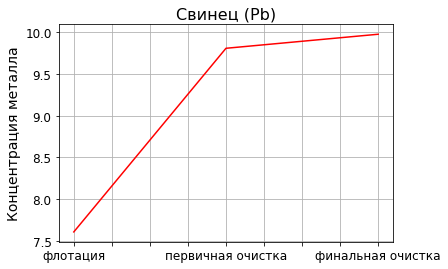

In [ ]:
df_pb.mean().plot(color = "red", subplots=True, fontsize=12, grid = "o")
plt.title('Свинец (Pb)', fontsize=16)
plt.ylabel('Концентрация металла', fontsize=14)
plt.show()

#### Ag

In [ ]:
df_ag = full_frame[['rougher.output.concentrate_ag', 
              'primary_cleaner.output.concentrate_ag', 
              'final.output.concentrate_ag']]
df_ag = df_ag.rename(columns={'rougher.output.concentrate_ag': 'флотация', 
                              'primary_cleaner.output.concentrate_ag': 'первичная очистка', 
                              'final.output.concentrate_ag': 'финальная очистка'})

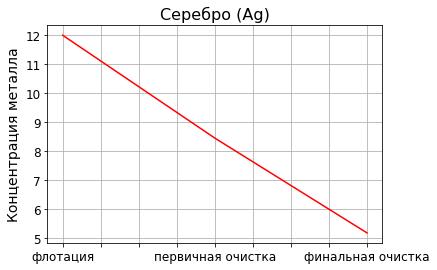

In [ ]:
df_ag.mean().plot(color = "red", subplots=True, fontsize=12, grid = "o")
plt.title('Серебро (Ag)', fontsize=16)
plt.ylabel('Концентрация металла', fontsize=14)
plt.show()

#### Au 

In [ ]:
df_au = full_frame[['rougher.output.concentrate_au', 
              'primary_cleaner.output.concentrate_au', 
              'final.output.concentrate_au']]
df_au = df_au.rename(columns={'rougher.output.concentrate_au': 'флотация', 
                              'primary_cleaner.output.concentrate_au': 'первичная очистка', 
                              'final.output.concentrate_au': 'финальная очистка'})

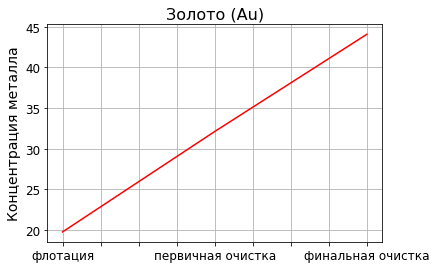

In [ ]:
df_au.mean().plot(color = "red", subplots=True, fontsize=12, grid = "o")
plt.title('Золото (Au)', fontsize=16)
plt.ylabel('Концентрация металла', fontsize=14)
plt.show()

* Концентрация серебра уменьшается в процессе очистки. Самая большая концентрация на первой стадии и самая маленькая на конечной.

* Концентрация свинца значительно повышается от стадии флотации к первичной очистке, и еще немного повышается на стадии финальной очистки.

* Концентрация золота равномерно повышается от флотации до финальной очистки.

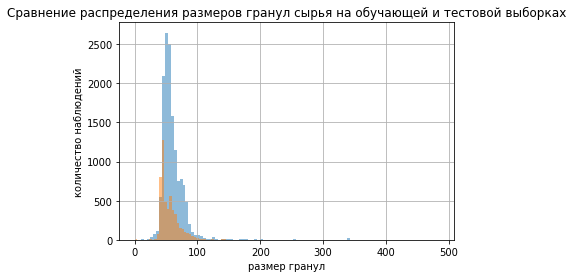

In [ ]:
train_frame['rougher.input.feed_size'].hist(bins=100, alpha=0.5, label='train')
test_frame['rougher.input.feed_size'].hist(bins=100, alpha=0.5, label='test')
plt.title('Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках')
plt.xlabel('размер гранул')
plt.ylabel('количество наблюдений')
plt.show()

визуально значительных отличий нет.

### суммарная концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [ ]:
train_frame = train_frame.drop(index = train_frame[train_frame["rougher.input.feed_au"] < 1].index,
                               axis = 0)
train_frame = train_frame.drop(index = train_frame[train_frame["rougher.input.feed_ag"] < 1].index,
                               axis = 0)
train_frame = train_frame.drop(index = train_frame[train_frame["rougher.input.feed_pb"] < 1].index,
                               axis = 0)
train_frame = train_frame.drop(index = train_frame[train_frame["rougher.input.feed_sol"] < 1].index,
                               axis = 0)


train_frame = train_frame.drop(index = train_frame[train_frame["rougher.output.concentrate_au"] < 1].index,
                               axis = 0)
train_frame = train_frame.drop(index = train_frame[train_frame["rougher.output.concentrate_ag"] < 1].index,
                               axis = 0)
train_frame = train_frame.drop(index = train_frame[train_frame["rougher.output.concentrate_pb"] < 1].index,
                               axis = 0)
train_frame = train_frame.drop(index = train_frame[train_frame["rougher.output.concentrate_sol"] < 1].index,
                               axis = 0)
train_frame = train_frame.drop(index = train_frame[train_frame["primary_cleaner.output.concentrate_au"] < 1].index,
                               axis = 0)
train_frame = train_frame.drop(index = train_frame[train_frame["primary_cleaner.output.concentrate_ag"] < 1].index,
                               axis = 0)
train_frame = train_frame.drop(index = train_frame[train_frame["primary_cleaner.output.concentrate_pb"] < 1].index,
                               axis = 0)
train_frame = train_frame.drop(index = train_frame[train_frame["primary_cleaner.output.concentrate_sol"] < 1].index,
                               axis = 0)

train_frame = train_frame.drop(index = train_frame[train_frame["final.output.concentrate_au"] < 1].index,
                               axis = 0)
train_frame = train_frame.drop(index = train_frame[train_frame["final.output.concentrate_ag"] < 1].index,
                               axis = 0)
train_frame = train_frame.drop(index = train_frame[train_frame["final.output.concentrate_pb"] < 1].index,
                               axis = 0)
train_frame = train_frame.drop(index = train_frame[train_frame["final.output.concentrate_sol"] < 1].index,
                               axis = 0)

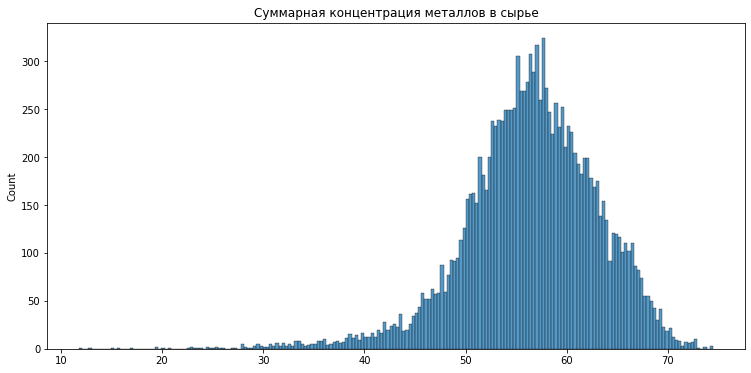

In [ ]:
before = train_frame[['rougher.input.feed_ag', 
                   'rougher.input.feed_pb', 
                   'rougher.input.feed_sol', 
                   'rougher.input.feed_au']].sum(axis=1)
plt.subplots(figsize = (12.5,6))
sns.histplot(before, fill=True, bins=200, palette='coolwarm')
plt.title('Суммарная концентрация металлов в сырье')
plt.show()

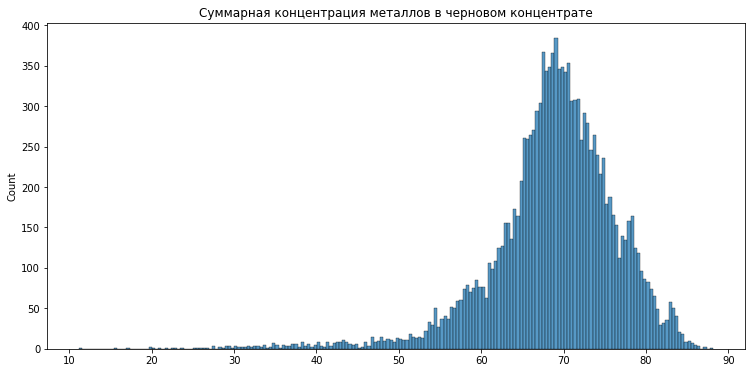

In [ ]:
middle = train_frame[['rougher.output.concentrate_pb', 
                   'rougher.output.concentrate_ag', 
                   'rougher.output.concentrate_sol', 
                   'rougher.output.concentrate_au']].sum(axis=1)
plt.subplots(figsize = (12.5,6))
sns.histplot(middle, fill=True, bins=200, palette='coolwarm')
plt.title('Суммарная концентрация металлов в черновом концентрате')
plt.show()

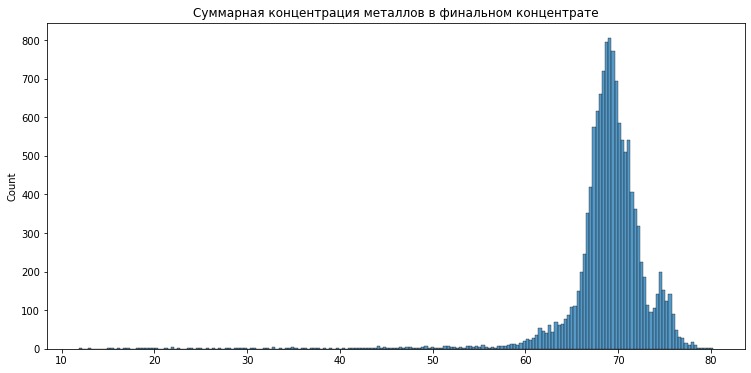

In [ ]:
final = train_frame[['final.output.concentrate_pb', 
                   'final.output.concentrate_ag', 
                   'final.output.concentrate_sol', 
                   'final.output.concentrate_au']].sum(axis=1)
plt.subplots(figsize = (12.5,6))
sns.histplot(final, fill=True, bins=200, palette='coolwarm')
plt.title('Суммарная концентрация металлов в финальном концентрате')
plt.show()

Аномалии больше всего проявляются на этапе черновой очистки, особенно в районе нуля. На этапе сырья их почти нет, в финальном концентрате есть, но не так много как на черновом. Эти аномалии могут влиять на конечные рассчетные характеристики. Поскольку в тестовой выборке содержатся только признаки для сырья, а в них почти нет аномалий, я не стала их удалять

## Модель

In [ ]:
df_target = full_frame[['date', 'rougher.output.recovery', 'final.output.recovery']]
df_target.head()

,date,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,87.107763,70.541216
1,2016-01-15 01:00:00,86.843261,69.266198
2,2016-01-15 02:00:00,86.842308,68.116445
3,2016-01-15 03:00:00,87.226430,68.347543
4,2016-01-15 04:00:00,86.688794,66.927016


In [ ]:
test_frame = test_frame.merge(df_target, how = 'left', on = 'date')

In [ ]:
test_frame.drop(['date'], axis=1, inplace=True)

In [ ]:
train_frame = train_frame.drop(set(train_frame.columns)-set(test_frame.columns), axis=1)

In [ ]:
def smape_total(target_rougher, predicted_rougher, target_final, predicted_final):
    smape_rough = 1/len(target_rougher) * np.sum(2 * np.abs(
      target_rougher - predicted_rougher) / (np.abs(target_rougher) + np.abs(predicted_rougher))*100)
    smape_fin = 1/len(target_final) * np.sum(2 * np.abs(
      target_final - predicted_final) / (np.abs(target_final) + np.abs(predicted_final))*100)
    return (0.25*smape_rough) + (0.75*smape_fin)


In [ ]:
def smape(target, predicted):
    return 1/len(target) * np.sum(2 * np.abs(
       target - predicted) / (np.abs(target) + np.abs(predicted))*100)
def smape_final(rougher, final):
    return 0.25*rougher + 0.75*final


In [ ]:
features_train_r = train_frame.filter(regex='^rougher',axis=1)
features_train_r = features_train_r.drop(['rougher.output.recovery'], axis=1)
target_train_r = train_frame['rougher.output.recovery']

features_train_f = train_frame.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_f = train_frame['final.output.recovery']

features_test_r = test_frame.filter(regex='^rougher',axis=1)
features_test_r = features_test_r.drop(['rougher.output.recovery'], axis=1)
target_test_r = test_frame['rougher.output.recovery']

features_test_f = test_frame.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_f = test_frame['final.output.recovery']

In [ ]:
display(features_train_r.shape)
display(target_train_r.shape)
display(features_train_f.shape)
display(target_train_f.shape)
display(features_test_r.shape)
display(target_test_r.shape)
display(features_test_f.shape)
display(target_test_f.shape)

(13304, 22)

(13304,)

(13304, 52)

(13304,)

(5276, 22)

(5276,)

(5276, 52)

(5276,)

# Обучение моделей

In [ ]:
model = LinearRegression()
scorer = make_scorer(smape)
rougher_lin = cross_val_score(model, features_train_r, target_train_r, scoring=scorer, cv=5)
final_lin =  cross_val_score(model, features_train_f, target_train_f, scoring=scorer, cv=5)
print('sMAPE =', smape_final(rougher_lin, final_lin).mean())

sMAPE = 9.673962390618957


In [ ]:
for depth in range(1, 22, 2):
    model2 = DecisionTreeRegressor(random_state=12345, max_depth = depth)
    scorer = make_scorer(smape)
    rougher_tree = cross_val_score(model2, features_train_r, target_train_r, scoring=scorer, cv=5)
    final_tree = cross_val_score(model2, features_train_f, target_train_f, scoring=scorer, cv=5)
    print('depth=',depth)
    print('sMAPE =',smape_final(rougher_tree, final_tree).mean())
print()

depth= 1
sMAPE = 8.854017023368183
depth= 3
sMAPE = 8.4622787502315
depth= 5
sMAPE = 8.857786336999299
depth= 7
sMAPE = 10.05176643163934
depth= 9
sMAPE = 10.65859180092193
depth= 11
sMAPE = 11.686966472954404
depth= 13
sMAPE = 11.547811546710147
depth= 15
sMAPE = 12.184880545619256
depth= 17
sMAPE = 13.662542532989875
depth= 19
sMAPE = 12.74352930298524
depth= 21
sMAPE = 13.221858775235244



Наилучший результат = 13.6 при глубине = 17. Этот результат лучше, чем у линейной регрессии = 9.67.

# Проверка

In [ ]:
dummy_model_r = DummyRegressor(strategy="mean")
dummy_model_f = DummyRegressor(strategy="mean")
dummy_model_r.fit(features_train_r, target_train_r)
dummy_model_f.fit(features_train_f, target_train_f)
test_predictions_r = dummy_model_r.predict(features_test_r)
test_predictions_f = dummy_model_f.predict(features_test_f)
print('sMAPE =',smape_total(target_test_r, test_predictions_r, target_test_f, test_predictions_f).mean())

sMAPE = 7.287810067213351


In [ ]:
model_r = DecisionTreeRegressor(random_state=12345, max_depth = 3)
model_f = DecisionTreeRegressor(random_state=12345, max_depth = 3)
model_r.fit(features_train_r, target_train_r)
model_f.fit(features_train_f, target_train_f)
test_predictions_r = model_r.predict(features_test_r)
test_predictions_f = model_f.predict(features_test_f)
print('Итоговое sMAPE на тестовой выборке:',smape_total(
    target_test_r, test_predictions_r, target_test_f, test_predictions_f).mean())


Итоговое sMAPE на тестовой выборке: 7.202288717314682


В ходе анализа данных было выявлено:
* Концентрация серебра уменьшается в процессе очистки. Самая большая концентрация на первой стадии и самая маленькая на конечной.

* Концентрация свинца значительно повышается от стадии флотации к первичной очистке, и еще немного повышается на стадии финальной очистки.

* Концентрация золота равномерно повышается от флотации до финальной очистки.

* Итоговая модель построена на алгоритме DecisionTreeRegressor

* sMAPE  = 7.20
